In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1

Pre-proccessing data steps:

In [2]:
df1 = pd.read_csv('steps.csv',sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv('survey.csv',sep=',')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


Combining our two files:

In [4]:
df3 = pd.merge(df1,df2, on="id") 
df3.head(10)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,NaN,NaN,Lille,Male,35-44,1,1,Vocational,170.0,63.0
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2442.0,NaN,Lille,Female,35-44,4,4,Vocational,172.0,69.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,NaN,NaN,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0


Removing impossible values:

In [5]:
df3 = df3[df3['weight'].notna()]
df3 = df3[df3['height'].notna()]

In [6]:
df3 = df2[(df2['weight'] > 40) & (df2['height'] > 150)]
df3.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0


Creating the variable mean steps per participant:

In [7]:
df3["mean_steps"]=df1.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)
print(df3["mean_steps"].head(10))

0    10205.521212
1     5687.423313
2     8301.729730
3     3633.200000
4     5312.129630
5    11908.509804
6     4715.400000
7     3594.051724
8     8626.707965
9     3787.043478
Name: mean_steps, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


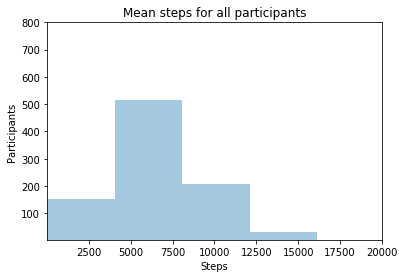

In [8]:
df3['mean_steps'].name = 'Steps' #Labeling the variable for plotting
file_steps = df3['mean_steps'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(file_steps, kde=False) 
plt.title('Mean steps for all participants') #creating a title for our plot
plt.ylabel('Participants')
plt.xlim([3,20000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,800])
plt.show()

Plotting (distplot) mean steps per participant for a certain day:

Summary statistics: mean and median

In [9]:
mean_steps = df3['mean_steps'].mean()
print(f'The mean steps is: {mean_steps} steps')

The mean steps is: 6994.673268800078 steps


In [10]:
median_steps = df3['mean_steps'].median()
print(f'The median steps is: {median_steps} steps')

The median steps is: 6238.780516853933 steps


The outliers are not 'shocking', only very small group has 12 000+ steps. The median and mean are quite similar to each other. This we see also on the plot, the most common result is between around 4000 till around 12 000 steps per participant.

The relation of mean steps per participant with two categorical variables:

In [11]:
df4=df3[['age','gender','mean_steps']]
df4.head()

,age,gender,mean_steps
0,25-34,Male,10205.521212
1,35-44,Male,5687.423313
2,25-34,Male,8301.729730
3,<25,Male,3633.200000
4,25-34,Female,5312.129630


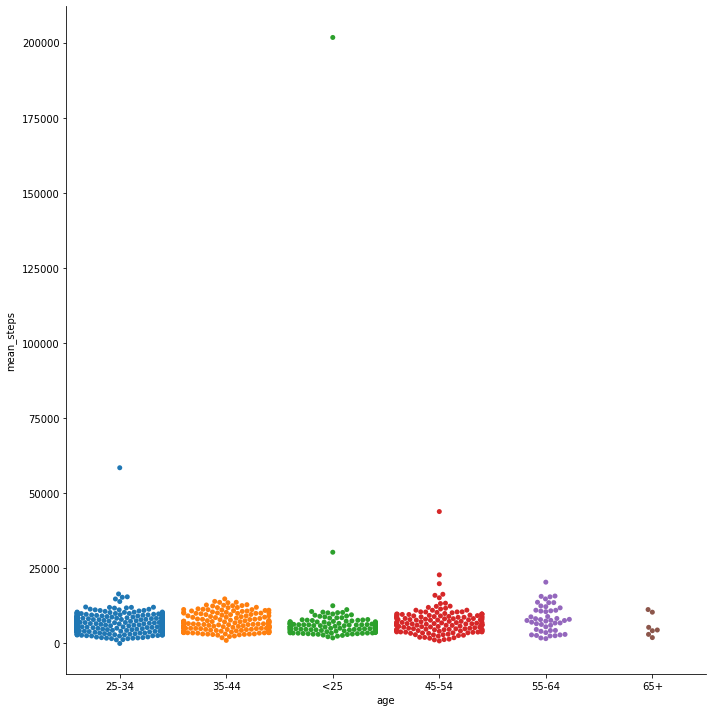

In [12]:
sns.catplot(data=df4, height=10, x="age", y="mean_steps", kind="swarm")
plt.show()

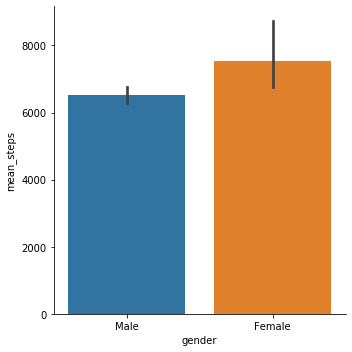

In [13]:
sns.catplot(data=df4, x="gender", y="mean_steps", kind="bar")

On the first plot we see that the biggest and most active age groups are: 25-34, 35-44, 45-54. Logically the group of 65+ was the smallest and least active.

On the second plot we see that women are more active and have higher average of mean steps than men.

# Part 2

Creating a dataframe for 3 numerical variables:

In [14]:
df5 = df3[['height','weight','mean_steps']]
df5.head()

,height,weight,mean_steps
0,178.0,98.0,10205.521212
1,180.0,77.0,5687.423313
2,180.0,83.0,8301.729730
3,178.0,80.0,3633.200000
4,167.0,61.0,5312.129630


Creating scatterplot for them:

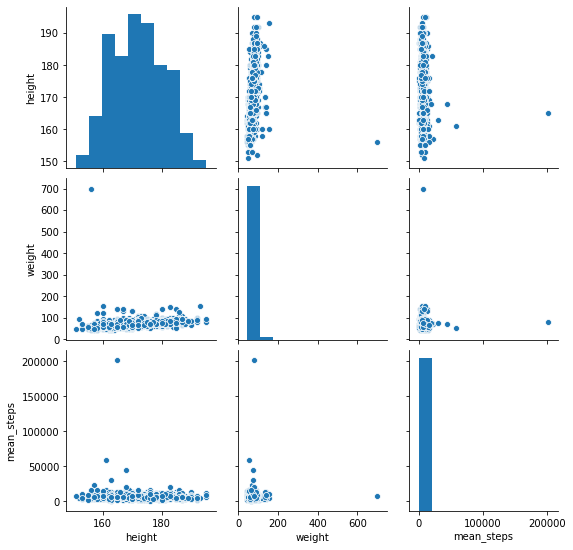

In [15]:
sns.pairplot(df5)
plt.show() #using Matplotlib to show the plot

In [16]:
corr = df5.corr()
corr

,height,weight,mean_steps
height,1.000000,0.254819,-0.057725
weight,0.254819,1.000000,-0.008517
mean_steps,-0.057725,-0.008517,1.000000


Scatterplot matrix: people with the height between 155-170 cm are the most active group and are most likely to make some steps "record". Weight category up to 100kg had the highest mean steps. 

Correlation matrix: we see that mean steps depend the most on the height of the participant.

# Part 3

In [17]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Creating dummies for categorical variables:

In [18]:
import pandas as pd 
pd.get_dummies(df3[['city','gender', 'education_1']]).head(10)

,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,gender_Female,gender_Male,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,1,0,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0
4,0,0,0,1,1,0,1,0,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,0,1
6,0,0,0,1,0,1,0,0,1,0,0,0
7,1,0,0,0,1,0,0,0,1,0,0,0
8,0,1,0,0,1,0,0,0,0,0,0,1
9,0,1,0,0,1,0,0,0,1,0,0,0


In [19]:
y = df5['mean_steps'] 
X = df5[['height','weight',]]
X.head(10)

,height,weight
0,178.0,98.0
1,180.0,77.0
2,180.0,83.0
3,178.0,80.0
4,167.0,61.0
5,170.0,63.0
6,175.0,75.0
7,165.0,88.0
8,172.0,69.0
9,165.0,93.0


age_dummy= pd.get_dummies(df3[['age']]).head(10)
df3=df3[df3['age'].notna()]
df3=pd.concat([df3,age_dummy], axis=1 )
df3.head()

df3.head()

check=df3['age_25-34'].isnull()
if check.any():
    print('there are nans')

In [20]:
df5=df5[df5['mean_steps'].notna()]

Creating a new df with only 1 independent and 2 dependent variables:

In [21]:
x=df5[['height', 'weight']]
y=df5[['mean_steps']]
X.head()

,height,weight
0,178.0,98.0
1,180.0,77.0
2,180.0,83.0
3,178.0,80.0
4,167.0,61.0


df3=pd.concat([df3,age_dummy], axis=1 )

Creating a model based on the ACTUAL data set:

In [22]:
lm=LinearRegression()
lm.fit(x,y)

df5['mean_steps_p']=lm.predict(x)
df5.head(10)

,height,weight,mean_steps,mean_steps_p
0,178.0,98.0,10205.521212,6738.872352
1,180.0,77.0,5687.423313,6601.097362
2,180.0,83.0,8301.729730,6612.461522
3,178.0,80.0,3633.200000,6704.779873
4,167.0,61.0,5312.129630,7207.795739
5,170.0,63.0,11908.509804,7064.583145
6,175.0,75.0,4715.400000,6842.310387
7,165.0,88.0,3594.051724,7356.934889
8,172.0,69.0,8626.707965,6977.946874
9,165.0,93.0,3787.043478,7366.405022


In [23]:
r2_score(df5['mean_steps'], df5['mean_steps_p'])

0.003372967059600218

The accurancy of my model is very low, it's 0,003%.

In [24]:
math.sqrt(mean_squared_error(df5['mean_steps'], df5['mean_steps_p']))

7390.994956124232

It is wrong on 7390 steps

In [25]:
df5['resid'] = df5['mean_steps_p'] - df5['mean_steps'] 
df3.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,11908.509804
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,4715.400000
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,3594.051724
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0,8626.707965
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,3787.043478


Trying to create a training data:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

ValueError: Found input variables with inconsistent numbers of samples: [920, 916]

Trying to create a test set:

In [ ]:
X_test.head()